<a href="https://colab.research.google.com/github/joohoshin/TensorflowAI/blob/main/18_2_Global_Average_Pooling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Global Average Pooling

http://emaraic.com/blog/weakly-supervised-detection

https://www.tensorflow.org/api_docs/python/tf/keras/layers/GlobalAveragePooling2D


In [ ]:
import tensorflow as tf
import numpy as np

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
print(x_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']               

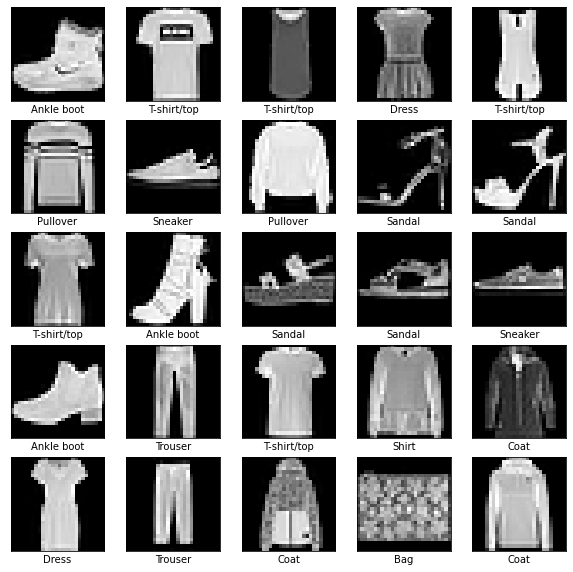

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap='gray')
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [ ]:
num_classes = 10

y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

x_train = np.expand_dims(x_train, axis=3)
x_test = np.expand_dims(x_test, axis=3)

x_train = x_train/255
x_test = x_test/255

from tensorflow.keras import layers, models

model = models.Sequential()
model.add(layers.Conv2D(32,(5,5), padding='valid', activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

epochs = 10
history = model.fit(x_train, y_train, batch_size=64,
          epochs=epochs, validation_data=(x_test, y_test))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              4719616   
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                10250     
Total params: 4,730,698
Trainable params: 4,730,698
Non-trainable params: 0
______________________________________________

In [ ]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

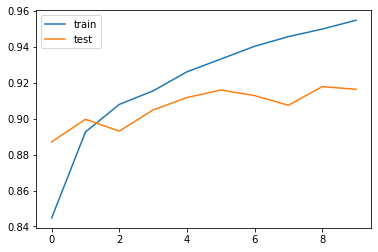

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['train', 'test'], loc='upper left')

In [ ]:
model2 = models.Sequential()
model2.add(layers.Conv2D(32,(5,5), padding='valid', activation='relu', input_shape=(28,28,1)))
model2.add(layers.MaxPool2D(2,2))
model2.add(layers.Conv2D(64,(3,3), padding='valid', activation='relu', input_shape=(28,28,1)))
model2.add(layers.MaxPool2D(2,2))
model2.add(layers.Conv2D(128,(3,3), padding='valid', activation='relu', input_shape=(28,28,1)))
model2.add(layers.GlobalAveragePooling2D())
model2.add(layers.Dense(10, activation='softmax'))
model2.summary()

model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

epochs = 10
history = model2.fit(x_train, y_train, batch_size=64,
          epochs=epochs, validation_data=(x_test, y_test))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
global_average_pooling2d (Gl (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)               

In [ ]:
gap = models.Model(inputs=model2.input, outputs=model2.layers[-2].output)

In [ ]:
pred0 = gap.predict(x_test[[0]])

In [ ]:
pred0.shape

(1, 128)